In [1]:
import boto3
import os
import json
import docx
from IPython.display import Markdown, display
import re

region = os.environ.get("AWS_REGION")
boto3_bedrock = boto3.client(service_name='bedrock-runtime')
from claude3 import Analyticsfunction, extract_python_code


obj = Analyticsfunction()
    
claude3 = obj.call_claude_sonet_text

In [2]:
def getText(filename):
    doc = docx.Document(filename)
    fullText = []
    for para in doc.paragraphs:
        fullText.append(para.text)
    return '\n'.join(fullText)

In [3]:
note = getText("Vector-notes.docx")

In [4]:
prompt =f'''Human: create question 2 multiple choice question and answer

<book>
{note}
</book>

Assistant:'''

body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})
text = claude3(body)
display(Markdown(text))

Okay, here are two multiple choice questions based on the given information about vectors:

Question 1: What is the scalar triple product of three vectors a, b and c?
(1) a . (b x c)
(2) (a x b) . c  
(3) a . b . c
(4) Both (1) and (2)

Question 2: If a, b and c are three coplanar vectors, then
(1) a . (b x c) = 0
(2) (a x b) . c = 0
(3) a . b . c = 0  
(4) Both (1) and (3)

In [6]:
context = "ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE "

In [7]:
prompt =f'''Human: write python code to draw the nice diagram using matplotlib and save as jpg, add the question into the image itself. 
<context>
{context}
</context>


Assistant:'''

body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})

In [8]:
text = claude3(body)

In [9]:
output_file = "output_python_code.py"  # Change this to your output file
extract_python_code(text, output_file)

In [13]:
!python3 output_python_code.py

Traceback (most recent call last):
  File "/Users/tiwarysa/Documents/Mathproblem/output_python_code.py", line 1, in <module>
    import matplotlib.pyplot as plt
ModuleNotFoundError: No module named 'matplotlib'


In [11]:
question = "If the position vectors of the vertices A, B, and C of a triangle △ABC are αi+βj+γk, βi+γj+αk, and γi+αj+βk respectively, then △ABC is "

In [22]:
prompt =f'''Human: Write Python code to draw the clear diagram in 2D for the given question using matplotlib and save it as a JPG file. Additionally, add the question text into the image itself.

{question}

Assistant:'''

body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})

In [23]:
text = claude3(body)
output_file = "output_python_code_2.py"
extract_python_code(text, output_file)

succesfuly


In [10]:
display(Markdown(text))

Here's a Python code that uses matplotlib to draw the diagram for the given question and save it as a JPG file:

```python
import matplotlib.pyplot as plt
import numpy as np

# Define the coordinates of the hexagon vertices
x = np.array([0, 2, 4, 4, 2, 0])
y = np.array([0, 0, 2, 4, 4, 2])

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the hexagon
ax.plot(x, y, 'r-', linewidth=2)

# Add vertex labels
labels = ['A', 'B', 'C', 'D', 'E', 'F']
for i, (xi, yi) in enumerate(zip(x, y)):
    ax.annotate(labels[i], (xi, yi), xytext=(xi + 0.2, yi + 0.2), fontsize=14)

# Add the question text
question = "ABCDEF is a hexagon (six-sided polygon). Find the value of AB+BC+CD+DE+AF+FE+AE"
ax.text(0.5, -0.15, question, ha='center', va='center', transform=ax.transAxes, fontsize=12)

# Set axis limits and remove ticks
ax.set_xlim([-1, 5])
ax.set_ylim([-1, 5])
ax.set_xticks([])
ax.set_yticks([])

# Set aspect ratio to make the hexagon look regular
ax.set_aspect('equal', adjustable='box')

# Save the figure as a JPG file
plt.savefig('hexagon_diagram.jpg', dpi=300, bbox_inches='tight')
```

This code will create a JPG file named `hexagon_diagram.jpg` in the same directory as the Python script. The image will contain a regular hexagon with vertex labels (A, B, C, D, E, F) and the question text at the bottom.

Note that you need to have matplotlib installed to run this code. You can install it using `pip install matplotlib`.

In [11]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('hexagon_diagram.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'hexagon_diagram.jpg'

In [26]:
! pygmentize output_python_code_2.py

import matplotlib.pyplot as plt
import numpy as np

# Define the question text
question_text = "If the position vectors of the vertices A, B, and C of a triangle \u2206ABC are \u03b1i+\u03b2j+\u03b3k, \u03b2i+\u03b3j+\u03b1k, and \u03b3i+\u03b1j+\u03b2k respectively, then \u2206ABC is"

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Define the position vectors
a = np.array([1, 2, 3])
b = np.array([2, 3, 1])
c = np.array([3, 1, 2])

# Plot the triangle
ax.plot([0, a[0]], [0, a[1]], color='k', linestyle='-', linewidth=2)
ax.plot([0, b[0]], [0, b[1]], color='k', linestyle='-', linewidth=2)
ax.plot([0, c[0]], [0, c[1]], color='k', linestyle='-', linewidth=2)
ax.plot([a[0], b[0]], [a[1], b[1]], color='k', linestyle='-', linewidth=2)
ax.plot([b[0], c[0]], [b[1], c[1]], color='k', linestyle='-', linewidth=2)
ax.plot([c[0], a[0]], [c[1], a[1]], color='k', linestyle='-', linewidth=2)

# Label the vertices
ax.text(a[0], a[1], 'A', fontsize=12)
ax.text(b[0], b[1], 'B', fonts

In [31]:
question = "If the adjacent sides of a parallelogram are 3i+2j and -i+4j+2k, find the area of the parallelogram."

In [47]:
prompt =f'''Human: Write Python code to draw the diagram for the given question using turtle and save it as a JPG file. Additionally, add the question text into the image itself.

{question}

Assistant:'''

body = json.dumps({"prompt": prompt, "max_tokens_to_sample": 1000, "temperature": 0.8})

In [48]:
text = claude3(body)

In [49]:
text

'Here\'s a Python code that uses the `turtle` library to draw the diagram for the given question and save it as a JPG file. The question text is also added to the image:\n\n```python\nimport turtle\nimport math\n\n# Set up the turtle screen\nscreen = turtle.Screen()\nscreen.bgcolor("white")\n\n# Create a turtle object\nt = turtle.Turtle()\nt.speed(0)  # Set the turtle speed to maximum\n\n# Define the function to draw the parallelogram\ndef draw_parallelogram(side1, side2):\n    # Draw the first side\n    t.pendown()\n    t.forward(side1[0])\n    t.left(90)\n    t.forward(side1[1])\n\n    # Draw the second side\n    t.left(90)\n    t.forward(side2[0])\n    t.left(90)\n    t.forward(side2[1])\n\n    # Complete the parallelogram\n    t.left(90)\n    t.forward(side1[0])\n    t.left(90)\n    t.forward(side1[1])\n\n    t.penup()\n\n# Define the function to calculate the area of the parallelogram\ndef calculate_area(side1, side2):\n    area = abs(side1[0] * side2[1] - side1[1] * side2[0])\n  

In [53]:
prompt1 =f'''Human: convert into python using matplotlib library
{text}

Assistant:'''

body1 = json.dumps({"prompt": prompt1, "max_tokens_to_sample": 1000, "temperature": 0.8})

In [54]:
text_p = claude3(body1)


In [55]:
text_p

'To convert the given Python code to use the `matplotlib` library instead of `turtle`, we can use the `matplotlib.pyplot` module. Here\'s the modified code:\n\n```python\nimport matplotlib.pyplot as plt\nimport numpy as np\n\n# Define the sides of the parallelogram\nside1 = np.array([3, 2])  # 3i + 2j\nside2 = np.array([-1, 4])  # -i + 4j\n\n# Define the function to draw the parallelogram\ndef draw_parallelogram(side1, side2):\n    # Create the vertices of the parallelogram\n    vertex1 = np.array([0, 0])\n    vertex2 = vertex1 + side1\n    vertex3 = vertex2 + side2\n    vertex4 = vertex1 + side2\n\n    # Create a list of vertices\n    vertices = [vertex1, vertex2, vertex3, vertex4, vertex1]\n\n    # Convert the vertices to a NumPy array\n    vertices = np.array(vertices)\n\n    # Plot the parallelogram\n    plt.figure(figsize=(8, 6))\n    plt.plot(vertices[:, 0], vertices[:, 1], \'-\')\n    plt.axis(\'equal\')\n    plt.title("Parallelogram")\n    plt.xlabel("X")\n    plt.ylabel("Y")\n

In [56]:
output_file = "output_python_code_2.py"
extract_python_code(text, output_file)

succesfuly


In [57]:
display(Markdown(text_p))

To convert the given Python code to use the `matplotlib` library instead of `turtle`, we can use the `matplotlib.pyplot` module. Here's the modified code:

```python
import matplotlib.pyplot as plt
import numpy as np

# Define the sides of the parallelogram
side1 = np.array([3, 2])  # 3i + 2j
side2 = np.array([-1, 4])  # -i + 4j

# Define the function to draw the parallelogram
def draw_parallelogram(side1, side2):
    # Create the vertices of the parallelogram
    vertex1 = np.array([0, 0])
    vertex2 = vertex1 + side1
    vertex3 = vertex2 + side2
    vertex4 = vertex1 + side2

    # Create a list of vertices
    vertices = [vertex1, vertex2, vertex3, vertex4, vertex1]

    # Convert the vertices to a NumPy array
    vertices = np.array(vertices)

    # Plot the parallelogram
    plt.figure(figsize=(8, 6))
    plt.plot(vertices[:, 0], vertices[:, 1], '-')
    plt.axis('equal')
    plt.title("Parallelogram")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)

    # Add the question text
    question = "If the adjacent sides of a parallelogram are 3i+2j and -i+4j+2k, find the area of the parallelogram."
    plt.text(-4, 5, question, fontsize=12)

# Define the function to calculate the area of the parallelogram
def calculate_area(side1, side2):
    area = abs(np.cross(side1, side2))
    return area

# Draw the parallelogram
draw_parallelogram(side1, side2)

# Calculate the area of the parallelogram
area = calculate_area(side1, side2)

# Add the area value to the plot
area_text = f"Area of the parallelogram = {area:.2f}"
plt.text(-4, 4.5, area_text, fontsize=12)

# Save the plot as a JPG file
plt.savefig("parallelogram_diagram.jpg", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()
```

In this code, we use the `numpy` library to perform vector operations and create the vertices of the parallelogram. The `matplotlib.pyplot` module is used to create the plot and draw the parallelogram.

Here's a breakdown of the code:

1. We define the sides of the parallelogram as NumPy arrays.
2. The `draw_parallelogram` function creates the vertices of the parallelogram based on the given sides, and then plots the parallelogram using `plt.plot`. It also adds the question text to the plot using `plt.text`.
3. The `calculate_area` function calculates the area of the parallelogram using the cross product of the two sides.
4. We call `draw_parallelogram` to plot the parallelogram and `calculate_area` to find the area.
5. The area value is added to the plot using `plt.text`.
6. The plot is saved as a JPG file using `plt.savefig`.
7. Finally, the plot is displayed using `plt.show`.

Note that you need to have `matplotlib` and `numpy` installed to run this code. You can install them using `pip`:

```
pip install matplotlib numpy
```

The output of this code will be a JPG file named `parallelogram_diagram.jpg` in the same directory as the Python script, containing the parallelogram, the question text, and the calculated area value.

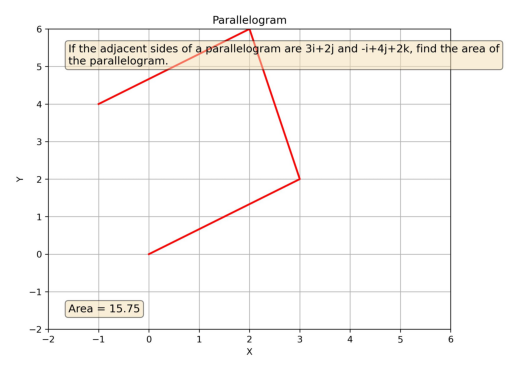

In [58]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the image
img = mpimg.imread('parallelogram_diagram.jpg')

# Display the image
plt.imshow(img)
plt.axis('off')  # Hide axis ticks and labels
plt.show()

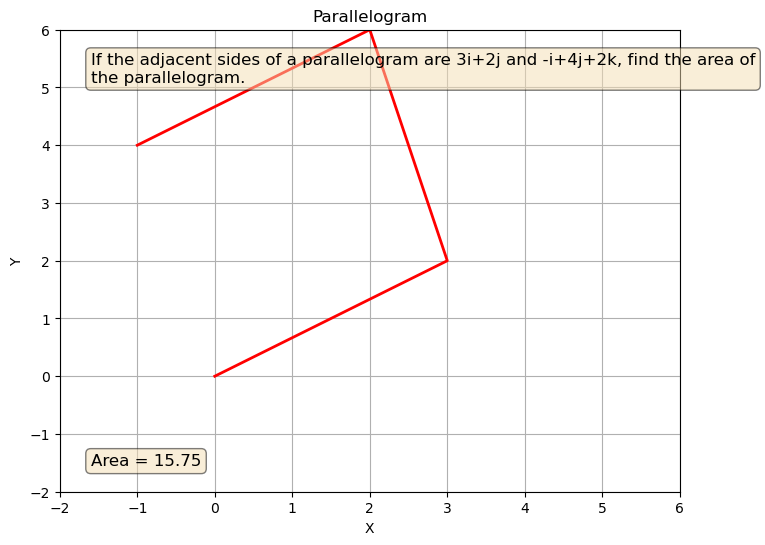

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# Parallelogram vectors
v1 = np.array([3, 2, 0])  # 3i + 2j
v2 = np.array([-1, 4, 2])  # -i + 4j + 2k

# Calculate the area using the cross product
area = np.linalg.norm(np.cross(v1, v2))

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the parallelogram
x = [0, v1[0], v1[0] + v2[0], v2[0]]
y = [0, v1[1], v1[1] + v2[1], v2[1]]
ax.plot(x, y, 'r-', linewidth=2)

# Add question text
question = "If the adjacent sides of a parallelogram are 3i+2j and -i+4j+2k, find the area of the parallelogram."
ax.text(0.05, 0.95, question, transform=ax.transAxes, fontsize=12, verticalalignment='top', wrap=True, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Add area text
area_text = f"Area = {area:.2f}"
ax.text(0.05, 0.05, area_text, transform=ax.transAxes, fontsize=12, verticalalignment='bottom', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Set axis limits and labels
ax.set_xlim(-2, 6)
ax.set_ylim(-2, 6)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Parallelogram')
ax.grid()

# Save the figure as a JPG file
plt.savefig('parallelogram_diagram.jpg', dpi=300, bbox_inches='tight')